In [55]:
import numpy as np

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import duplicate_audio.wavBasicRead as wbr
import glob

In [6]:
wav_file_names = glob.glob("./resources/wav/*.wav")
wav_file_names

['./resources/wav/01-drum-loop-127-bpm.wav',
 './resources/wav/02-drum-loop-127-bpm copy.wav',
 './resources/wav/02-drum-loop-127-bpm.wav',
 './resources/wav/03-drum-loop-127-bpm.wav',
 './resources/wav/04-drum-loop-127-bpm copy.wav',
 './resources/wav/04-drum-loop-127-bpm.wav',
 './resources/wav/Slow-beat-90-bpm copy 2.wav',
 './resources/wav/Slow-beat-90-bpm copy.wav',
 './resources/wav/Slow-beat-90-bpm.wav']

In [8]:
wavs = wbr.read_list_wav(wav_file_names)

//anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:179: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [42]:
wavs[0]["data"]

array([[  0,   0],
       [ -3,   0],
       [ -7,   1],
       ..., 
       [  1,   1],
       [-13,   5],
       [  0,   0]], dtype=int16)

In [79]:
def calc_save_nchannels(in_dict, data_idx="data", nchannels_idx="channels_n"):
    in_dict[nchannels_idx] = in_dict[data_idx].shape[1]

In [80]:
list(map(calc_save_nchannels, wavs))

[None, None, None, None, None, None, None, None, None]

****
## calculate periodogram with Welch

In [89]:
def calc_welch(in_array, fs, nperseg=256, noverlap=None):
    return signal.welch(in_array, fs, nperseg=nperseg, noverlap=noverlap)

In [111]:
def calc_save_welch(in_dict, nperseg=256, noverlap=None, 
                    data_idx="data", welch_idx="welch", nchannels_idx="channels_n", sfreq_idx="sampling_frequency"):
    # FIXME: @motjuste: what if nchannels_id does not exist?
    in_dict[welch_idx] = []
    for c in range(in_dict[nchannels_idx]):
        in_dict[welch_idx].append(calc_welch(in_dict[data_idx][:, c], in_dict[sfreq_idx]))

****
Test on Temp

In [112]:
wav_tmp = []
from copy import deepcopy
wav_tmp = deepcopy(wavs[0])

In [113]:
wav_tmp["data"][:, 0]

array([  0,  -3,  -7, ...,   1, -13,   0], dtype=int16)

In [114]:
wav_tmp["sampling_frequency"]

44100

In [115]:
calc_save_welch(wav_tmp)

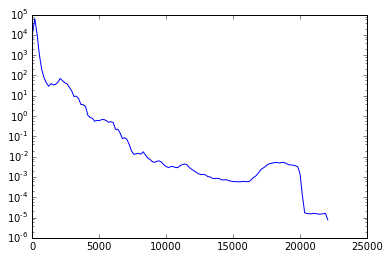

In [123]:
f, Pxx = wav_tmp["welch"][0]
plt.semilogy(f, Pxx)

****

In [125]:
list(map(calc_save_welch, wavs))

[None, None, None, None, None, None, None, None, None]

Number of wav files :  9


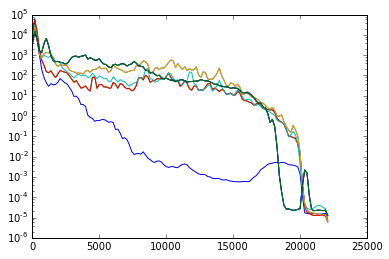

In [127]:
print ("Number of wav files : ", len(wavs))
for w in wavs:
    f, p = w["welch"][0]
    plt.semilogy(f, p)

****
## Calculate RMS power

In [61]:
def rms(arr, axis=None):
    return np.sqrt(np.mean(arr**2, axis=axis))

In [78]:
def calc_save_channel_rms(in_dict, data_idx="data", channel_rms_idx="rms_channels"):
    in_dict[channel_rms_idx] = rms(in_dict[data_idx], axis=0)

In [81]:
list(map(calc_save_channel_rms, wavs))

[None, None, None, None, None, None, None, None, None]

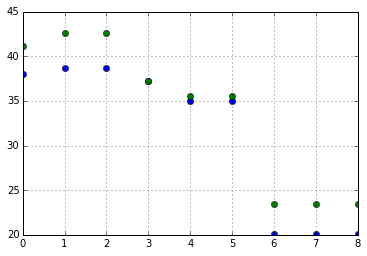

In [82]:
plt.plot(np.arange(len(wavs)), [w["rms_channels"][0] for w in wavs], 'o')
plt.plot(np.arange(len(wavs)), [w["rms_channels"][1] for w in wavs], 'o')
plt.grid(True)

****

****
Audio Fingerprinting

In [128]:
wav_shz = deepcopy(wavs[-1])

In [132]:
[f, t, Sxx] = signal.spectrogram(wav_shz["data"][:, 0])

In [140]:
from skimage.feature import peak_local_max

In [173]:
local_max = peak_local_max(Sxx, min_distance=2, exclude_border=True, threshold_rel=0)

In [175]:
local_max.shape
# np.max(local_max, 0)
# Sxx.shape

(1831, 2)

In [176]:
lmx = np.zeros(Sxx.shape)
lmx[local_max[:, 0], local_max[:, 1]] = 1

In [160]:
%matplotlib
# plt.pcolormesh(t, f, Sxx)
# plt.pcolormesh(t, f, lmx)

Using matplotlib backend: MacOSX


In [177]:
plt.figure()
plt.imshow(np.log(Sxx))

In [178]:
plt.figure()
plt.imshow(lmx * 255, cmap=plt.cm.gray)

In [172]:
Sxx.max()

7.3784877e+10